In [7]:
import numpy as np
import pandas as pd

EDA

In [8]:
data=pd.read_csv("movie.csv")
data

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [9]:
data.shape

(40000, 2)

In [10]:
data['text'].nunique()

39723

In [11]:
data=data.drop_duplicates()

In [12]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [13]:
data['label'].value_counts()

label
1    19908
0    19815
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
new_col=data['text'].str.len()#create a series of reviews list
data['length']=new_col#add length column
data


C:\Users\HARSH SARAWAGI\AppData\Local\Temp\ipykernel_20264\4033236212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length']=new_col#add length column


,text,label,length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,3111
39996,This movie is an incredible piece of work. It ...,1,291
39997,My wife and I watched this movie because we pl...,0,1092
39998,"When I first watched Flatliners, I was amazed....",1,1045


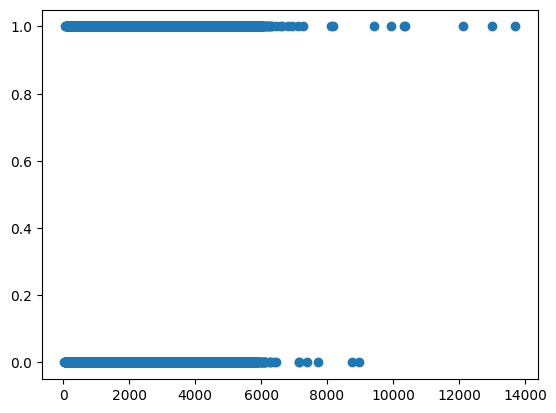

In [16]:
plt.scatter(data['length'],data['label'])

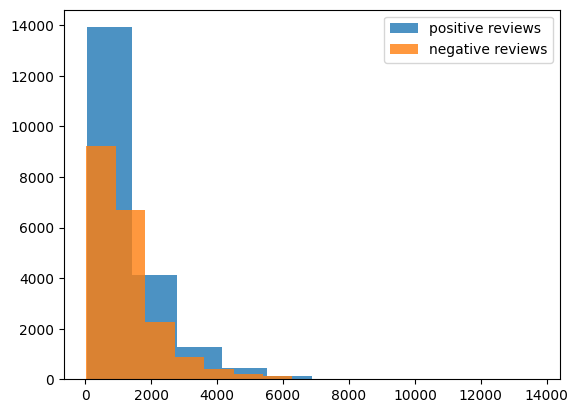

In [17]:

plt.hist(data[data['label']==1]['length'],label='positive reviews',alpha=0.8)
plt.hist(data[data['label']==0]['length'],label='negative reviews',alpha=0.8)
plt.legend()
plt.xlabel='text length'

DATA Preprocessing

In [18]:
import nltk
from nltk.corpus import stopwords

In [19]:
stop_words=set(stopwords.words('english'))


In [20]:
import re
def filtering(x):
    #print (x)
    pattern =r'[^a-zA-Z\s]'
    x=re.sub(pattern,'',x)
    
    #print(y)
    #print (x)

    str_lst=str(x).lower().split()# converts to lower case and make list of words
    # print(str_lst)
    str_lst_new=[]
    for word in str_lst:
        if word not in stop_words:
            str_lst_new.append(word)
    #print(str_lst_new)
    
    x=' '.join(str(ele) for ele in str_lst_new)
    #print(x)
    return x
data_new=data['text'].apply(lambda x: filtering(x))
data['text']=data_new
data

C:\Users\HARSH SARAWAGI\AppData\Local\Temp\ipykernel_20264\1597289402.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text']=data_new


,text,label,length
0,grew b watching loving thunderbirds mates scho...,0,874
1,put movie dvd player sat coke chips expectatio...,0,1811
2,people know particular time past like feel nee...,0,983
3,even though great interest biblical movies bor...,0,351
4,im die hard dads army fan nothing ever change ...,1,983
...,...,...,...
39995,western union something forgotten classic west...,1,3111
39996,movie incredible piece work explores every noo...,1,291
39997,wife watched movie plan visit sicily stromboli...,0,1092
39998,first watched flatliners amazed necessary feat...,1,1045


In [21]:
x=data['text'].apply(lambda x: nltk.word_tokenize(x))
x

0        [grew, b, watching, loving, thunderbirds, mate...
1        [put, movie, dvd, player, sat, coke, chips, ex...
2        [people, know, particular, time, past, like, f...
3        [even, though, great, interest, biblical, movi...
4        [im, die, hard, dads, army, fan, nothing, ever...
                               ...                        
39995    [western, union, something, forgotten, classic...
39996    [movie, incredible, piece, work, explores, eve...
39997    [wife, watched, movie, plan, visit, sicily, st...
39998    [first, watched, flatliners, amazed, necessary...
39999    [would, film, good, gross, estimated, award, n...
Name: text, Length: 39723, dtype: object

In [22]:
sm=nltk.PorterStemmer()
def stemmer(x):
    text=[sm.stem(word) for word in x]
    return text
x=x.apply(lambda x: stemmer(x))
x

0        [grew, b, watch, love, thunderbird, mate, scho...
1        [put, movi, dvd, player, sat, coke, chip, expe...
2        [peopl, know, particular, time, past, like, fe...
3        [even, though, great, interest, biblic, movi, ...
4        [im, die, hard, dad, armi, fan, noth, ever, ch...
                               ...                        
39995    [western, union, someth, forgotten, classic, w...
39996    [movi, incred, piec, work, explor, everi, nook...
39997    [wife, watch, movi, plan, visit, sicili, strom...
39998    [first, watch, flatlin, amaz, necessari, featu...
39999    [would, film, good, gross, estim, award, nomin...
Name: text, Length: 39723, dtype: object

In [23]:
def lemmatizer(x):
    str_new=[]
    for i in range(0,len(x)):
        #print(x[i])
        str_new.append(nltk.stem.WordNetLemmatizer().lemmatize(x[i]))
    #print(str_new)
    return ''.join(str(ele+' ') for ele in str_new)
x=x.apply(lambda x: lemmatizer(x))
x


0        grew b watch love thunderbird mate school watc...
1        put movi dvd player sat coke chip expect hope ...
2        peopl know particular time past like feel need...
3        even though great interest biblic movi bore de...
4        im die hard dad armi fan noth ever chang got t...
                               ...                        
39995    western union someth forgotten classic western...
39996    movi incred piec work explor everi nook cranni...
39997    wife watch movi plan visit sicili stromboli so...
39998    first watch flatlin amaz necessari featur good...
39999    would film good gross estim award nomin john t...
Name: text, Length: 39723, dtype: object

In [24]:
# x_test=x_test.apply(lambda x: nltk.word_tokenize(x))
# x_test
# def lemmatizer(x):
#     str_new=[]
#     for i in range(0,len(x)):
#         #print(x[i])
#         str_new.append(nltk.stem.WordNetLemmatizer().lemmatize(x[i]))
#     #print(str_new)
#     return ''.join(str(ele+' ') for ele in str_new)
# x_test=x_test.apply(lambda x: lemmatizer(x))
# x_test

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['text'],data['label'],random_state=101,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(31778,)
(7945,)


Feature Extraction

In [26]:
#TF_IDF_vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer().fit(x_train)
#vect_test=TfidfVectorizer().fit(x_test)

#print(vect_test)
#print(vect_train)
vectorised_x_train=vect.transform(x_train)
vectorised_x_test=vect.transform(x_test)


In [27]:
# from sklearn.preprocessing import OneHotEncoder
# one_hot=OneHotEncoder()
# one_hot_encoded=one_hot.fit(x_train)
# one_hot_x_train=one_hot_encoded.transform(x_train)
# one_hot_x_test=one_hot_encoded.transform(x_test)

In [28]:
#count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv_encoder=cv.fit(x_train)
cv_x_train=cv_encoder.transform(x_train)
cv_x_test=cv_encoder.transform(x_test)

In [29]:
# !pip install gensim
# from gensim.models import word2vec
# showing some error in installation of gensim module


Model Building

Accuracy using Logistic Regression: 89.28 %
roc_auc_score using Logistic Regression: 0.89
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3808
           1       0.91      0.88      0.90      4137

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



TypeError: 'str' object is not callable

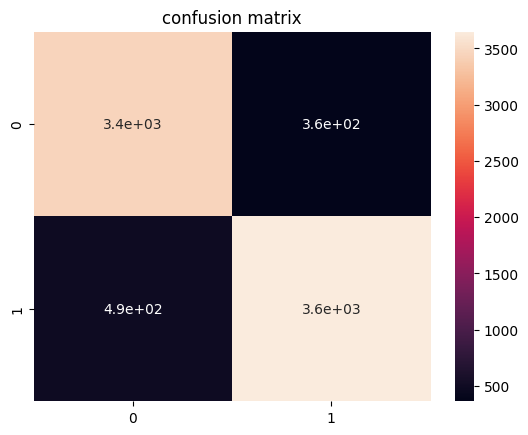

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,confusion_matrix,classification_report

model=LogisticRegression().fit(vectorised_x_train,y_train)
y_predict=model.predict(vectorised_x_test)
print(f"Accuracy using Logistic Regression: {accuracy_score(y_predict,y_test)*100:.2f} %")
print(f"roc_auc_score using Logistic Regression: {roc_auc_score(y_predict,y_test):.2f}")
print(classification_report(y_predict,y_test))
#print(confusion_matrix(y_predict,y_test))
sns.heatmap(confusion_matrix(y_predict,y_test),annot=True)
plt.title("confusion matrix")
plt.xlabel("predicted_values")
plt.ylabel("true vaues")
plt.show()

In [37]:
from sklearn import svm

model=svm.SVC(kernel='linear').fit(vectorised_x_train,y_train)
y_predict=model.predict(vectorised_x_test)
print(f"Accuracy using KNN: {accuracy_score(y_predict,y_test)*100:.2f} %")
print(f"roc_auc_score using KNN: {roc_auc_score(y_predict,y_test):.2f}")
print(classification_report(y_predict,y_test))
#print(confusion_matrix(y_predict,y_test))
sns.heatmap(confusion_matrix(y_predict,y_test),annot=True)
plt.title("confusion matrix")
plt.xlabel("predicted value")
plt.ylabel("true vaues")
plt.show()



0.8961611076148521

Accuracy using KNN: 76.32 %
roc_auc_score using KNN: 0.77
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      3367
           1       0.84      0.73      0.78      4578

    accuracy                           0.76      7945
   macro avg       0.76      0.77      0.76      7945
weighted avg       0.77      0.76      0.76      7945



TypeError: 'str' object is not callable

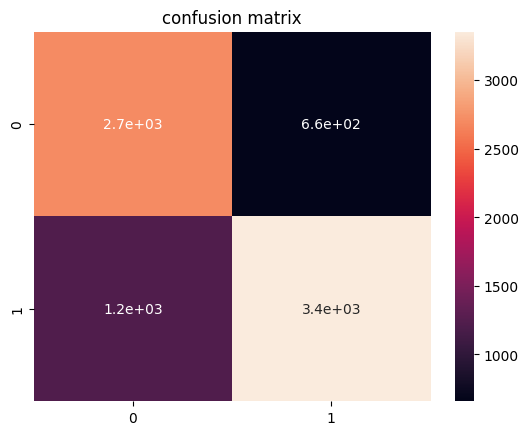

In [38]:
from sklearn import neighbors

knn=neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model=knn.fit(vectorised_x_train,y_train)
y_predict=knn_model.predict(vectorised_x_test)
print(f"Accuracy using KNN: {accuracy_score(y_predict,y_test)*100:.2f} %")
print(f"roc_auc_score using KNN: {roc_auc_score(y_predict,y_test):.2f}")
print(classification_report(y_predict,y_test))
#print(confusion_matrix(y_predict,y_test))
sns.heatmap(confusion_matrix(y_predict,y_test),annot=True)
plt.title("confusion matrix")
plt.xlabel("predicted value")
plt.ylabel("true vaues")
plt.show()


Accuracy using RandomForest: 84.67 %
roc_auc_score using RandomForest: 0.85
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4008
           1       0.84      0.85      0.85      3937

    accuracy                           0.85      7945
   macro avg       0.85      0.85      0.85      7945
weighted avg       0.85      0.85      0.85      7945



TypeError: 'str' object is not callable

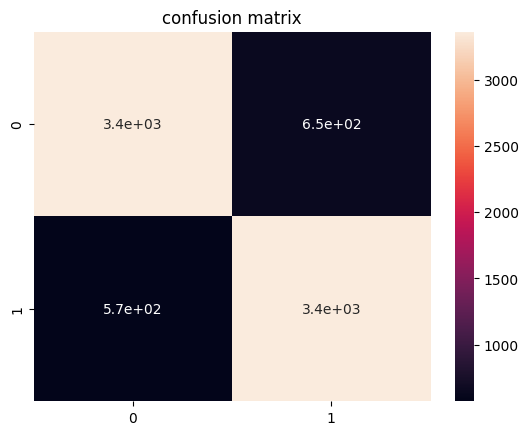

In [39]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier().fit(vectorised_x_train,y_train)
y_predict=model.predict(vectorised_x_test)
print(f"Accuracy using RandomForest: {accuracy_score(y_predict,y_test)*100:.2f} %")
print(f"roc_auc_score using RandomForest: {roc_auc_score(y_predict,y_test):.2f}")
print(classification_report(y_predict,y_test))
#print(confusion_matrix(y_predict,y_test))
sns.heatmap(confusion_matrix(y_predict,y_test),annot=True)
plt.title("confusion matrix")
plt.xlabel("predicted value")
plt.ylabel("true vaues")
plt.show()


Accuracy using RandomForest: 84.67 %
roc_auc_score using RandomForest: 0.85
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4008
           1       0.84      0.85      0.85      3937

    accuracy                           0.85      7945
   macro avg       0.85      0.85      0.85      7945
weighted avg       0.85      0.85      0.85      7945



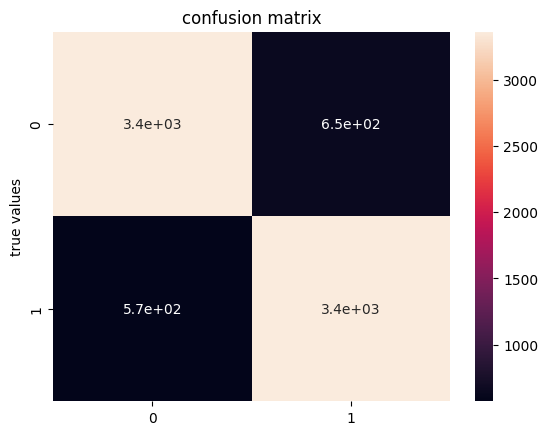

In [50]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB().fit(vectorised_x_train,y_train)
y_predicted=BNB.predict(vectorised_x_test)
accuracy_score(y_predict,y_test)
print(f"Accuracy using RandomForest: {accuracy_score(y_predict,y_test)*100:.2f} %")
print(f"roc_auc_score using RandomForest: {roc_auc_score(y_predict,y_test):.2f}")
print(classification_report(y_predict,y_test))
#print(confusion_matrix(y_predict,y_test))
sns.heatmap(confusion_matrix(y_predict,y_test),annot=True)
plt.title("confusion matrix")
plt.ylabel("true values")
plt.xlabel("predicted value")
plt.show()
